In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file = pd.read_excel('Original Iris.xlsx')
file.drop(columns = ['Unnamed: 0'], inplace = True)
file['target'] = file['target'].astype('category').cat.codes
file.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
file.describe()

,sepal length,sepal width,petal length,petal width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int8   
dtypes: float64(4), int8(1)
memory usage: 5.0 KB


In [9]:
file.corr()

,sepal length,sepal width,petal length,petal width,target
sepal length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal width,0.817954,-0.356544,0.962757,1.000000,0.956464
target,0.782561,-0.419446,0.949043,0.956464,1.000000


So here we can see that there is a high correlation among petal width and target 

<AxesSubplot:>

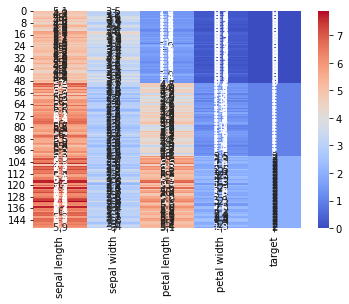

In [12]:
sns.heatmap(file,annot = True, cmap = 'coolwarm')

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
lin_reg = LinearRegression()

row = file.shape[0]
train, test = file.iloc[:int(row*0.80)], file.iloc[int(row*0.80): ]
trainX, trainY = train.iloc[:,:-1], train.iloc[:, [-1]]
testX,testY = test.iloc[:,:-1], test.iloc[:, [-1]]

model = lin_reg.fit(trainX, trainY)


In [15]:
pred = model.predict(testX)